<a href="https://colab.research.google.com/github/neuroidss/FreeEEG8-alpha/blob/main/freeeeg8_alpha_create_function_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# init 1

In [ ]:
!curl https://ollama.ai/install.sh | sh

In [2]:
import subprocess
process = subprocess.Popen("ollama serve", shell=True)

In [ ]:
%cd /content
!git clone https://github.com/neuroidss/freeeeg8-alpha
%cd /content/freeeeg8-alpha
!git clone https://github.com/neuroidss/create_function_chat

In [ ]:
!pip install ollama

In [ ]:
!pip install kicad-skip

In [ ]:
!pip install git+https://github.com/devbisme/kinet2pcb

In [ ]:
!add-apt-repository --yes ppa:kicad/kicad-7.0-releases
!apt update
#!apt install --install-recommends kicad
!apt-mark hold kicad-demos kicad-doc-en kicad-packages3d
!apt install kicad

In [ ]:
!ollama pull qwen2.5:7b-instruct-q8_0
#!ollama pull llama3.1:8b-instruct-q8_0
#!ollama pull mistral-nemo:12b-instruct-2407-q6_K

# create_function_chat kicad_sch

In [9]:
%cd /content/freeeeg8-alpha
!python create_function_chat/create_function_chat.py \
"call Create function with name='create_symbols_from_json_string' description=\"with schematic_file_in, schematic_file_out, symbols_string as parameter do following, import json; import skip; symbols = json.loads(symbols_string);  sch=skip.Schematic(schematic_file_in); for symbol_idx, symbol in enumerate(symbols):;    print(symbol);  labels_len=len(symbol[1]); sch_symbol=sch.symbol.reference_matches('JSOME'+str(labels_len)+'_1')[0].clone();    sch_symbol.setAllReferences(symbol[0]);    sch_symbol.property.Footprint.setValue(symbol[2]);   symbol_move=[20,0,0]; sch_symbol.move([sch_symbol.at.value[0]+symbol_move[0]*(symbol_idx+1), sch_symbol.at.value[1]+symbol_move[1]*(symbol_idx+1)], sch_symbol.at.value[2]+symbol_move[2]*(symbol_idx+1)); for label_idx, label in enumerate(symbol[1]):;    sch_label=sch.label.new();   sch_label.value=label;   pin_prefix='Pin_';  sch_label.move(sch_symbol.pin[pin_prefix+str(label_idx+1)].location.value); sch.write(schematic_file_out)\" use_cache=true" \
"call Create function with description='load json from json_file_name, and then output as json string without whitespaces' name='read_json_file' use_cache=true" \
'call read_json_file with json_file_name="freeeeg8-alpha_kicad_sch.json" with brief description, in pair of sentences' \
"call create_symbols_from_json_string with schematic_file_in=template_jsome.kicad_sch, schematic_file_out=freeeeg8-alpha.kicad_sch, symbols_string with all components from full response as JSON string format [ [ref1,[label11,label12],footprint1],[ref2,[label21,label22],footprint2] ]" \
"call Create function with name='kicad_sch_to_net_to_pcb' description=\"write 'import os'; then with kicad_sch_filename, net_filename, kicad_pcb_filename, pretty_folder_name as parameters do following, set environment variable KICAD7_FOOTPRINT_DIR=/usr/share/kicad/footprints/; execute in shell two commands, kicad-cli sch export netlist {kicad_sch_filename} --output {net_filename};  kinet2pcb -i {net_filename} --output {kicad_pcb_filename} -l {pretty_folder_name}\" use_cache=true" \
"call kicad_sch_to_net_to_pcb with kicad_sch_filename=freeeeg8-alpha.kicad_sch, net_filename=freeeeg8-alpha.net, kicad_pcb_filename=freeeeg8-alpha.kicad_pcb, pretty_folder_name=/content/freeeeg8-alpha" \
"/exit"

/content/freeeeg8-alpha
argument list: ['create_function_chat/create_function_chat.py', 'call Create function with name=\'create_symbols_from_json_string\' description="with schematic_file_in, schematic_file_out, symbols_string as parameter do following, import json; import skip; symbols = json.loads(symbols_string);  sch=skip.Schematic(schematic_file_in); for symbol_idx, symbol in enumerate(symbols):;    print(symbol);  labels_len=len(symbol[1]); sch_symbol=sch.symbol.reference_matches(\'JSOME\'+str(labels_len)+\'_1\')[0].clone();    sch_symbol.setAllReferences(symbol[0]);    sch_symbol.property.Footprint.setValue(symbol[2]);   symbol_move=[20,0,0]; sch_symbol.move([sch_symbol.at.value[0]+symbol_move[0]*(symbol_idx+1), sch_symbol.at.value[1]+symbol_move[1]*(symbol_idx+1)], sch_symbol.at.value[2]+symbol_move[2]*(symbol_idx+1)); for label_idx, label in enumerate(symbol[1]):;    sch_label=sch.label.new();   sch_label.value=label;   pin_prefix=\'Pin_\';  sch_label.move(sch_symbol.pin[pin_

# init 2

In [ ]:
!pip install kigadgets
%cd /content/freeeeg8-alpha
!git clone https://github.com/atait/kicad-python.git

In [ ]:
import pcbnew; print(pcbnew.__file__, pcbnew.SETTINGS_MANAGER.GetUserSettingsPath())

In [ ]:
!link_kicad_python_to_pcbnew /usr/lib/python3/dist-packages/pcbnew.py /root/.config/kicad/7.0

In [13]:
%cp template_jsome.kicad_pro freeeeg8-alpha.kicad_pro

# create_function_chat kicad_pcb

In [14]:
%cd /content/freeeeg8-alpha
!python create_function_chat/create_function_chat.py \
"call Create function with name='setup_pcb_from_string' description=\"with setup_string, pcb_size_string, board_file_name as parameters do following, import json; setup = json.loads(setup_string); import sys; sys.path.append('kicad-python/'); from kicad.pcbnew.board import Board; import pcbnew; pcb=Board.load(board_file_name); from pcbnew import FromMM; pcb_size = float(pcb_size_string); pcb.add_circle((0,0),pcb_size,'Edge.Cuts'); pcbnew.Refresh(); pcb.save(); for symbol in setup:;    print(symbol);    footprint=pcb.footprints[symbol[0]];  footprint.x=symbol[1];  footprint.y=symbol[2];  footprint.rotation = symbol[3];  if not(symbol[4] == footprint.layer) and (symbol[4] in ['F.Cu', 'B.Cu']):;    footprint._obj.Flip(footprint._obj.GetCenter(),True); pcbnew.Refresh(); pcb.save(); pcb=Board.load(board_file_name); board = pcb._obj; des = board.GetDesignSettings(); des.m_CopperEdgeClearance = pcbnew.FromMM(0.1); des.m_HoleClearance = FromMM(0.1); des.m_HoleToHoleMin = pcbnew.FromMM(0.2); des.m_MinClearance = FromMM(0.1); des.m_MinThroughDrill = pcbnew.FromMM(0.2); des.m_ViasMinSize = FromMM(0.3); net_set=des.m_NetSettings; def_net_class = net_set.m_DefaultNetClass; def_net_class.SetTrackWidth(FromMM(0.127)); def_net_class.SetClearance(FromMM(0.1)); def_net_class.SetViaDiameter(FromMM(0.3)); def_net_class.SetViaDrill(FromMM(0.2)); pcb.save();\" use_cache=true" \
"call Create function with description='load json from json_file_name, and then output as json string without whitespaces' name='read_json_file' use_cache=true" \
"call function create_function with parameters name='setup_pcb_layers', description=\"with gnd_size_mm_string, gnd_netname, board_file_name as parameters do following, import sys; sys.path.append('kicad-python/'); from kicad.pcbnew.board import Board; import pcbnew; pcb=Board.load(board_file_name); board = pcb._obj; enabled_layers =  board.GetEnabledLayers(); enabled_layers.AddLayer(pcbnew.In1_Cu); enabled_layers.AddLayer(pcbnew.In2_Cu); board.SetEnabledLayers(enabled_layers); from pcbnew import FromMM; gnd_size = FromMM(float(gnd_size_mm_string)); pts = [(-gnd_size, -gnd_size), (-gnd_size, gnd_size), (gnd_size, gnd_size), (gnd_size,-gnd_size)]; sps = pcbnew.SHAPE_POLY_SET(); chain = pcbnew.SHAPE_LINE_CHAIN(); for (x,y) in pts:;    chain.Append(x, y); chain.SetClosed(True); sps.AddOutline(chain); ps = pcbnew.PCB_SHAPE(board, pcbnew.SHAPE_T_POLY); ps.SetPolyShape(sps); z = pcbnew.ZONE(board); z.SetLayer(pcbnew.In2_Cu); z.AddPolygon( chain ); board.Add(z); filler = pcbnew.ZONE_FILLER(board); filler.Fill(board.Zones()); nets=board.GetNetsByName(); for netname, net in nets.items():;    netname = net.GetNetname();    if str(netname) == gnd_netname :;        gnd_net=net; z.SetNet(gnd_net); z.SetLocalClearance(FromMM(0.1)); pcbnew.Refresh(); pcb.save();\", use_cache=true" \
"call Create function with name='freerouting_and_pcbway' description=\"with freerouting_plugin, pcbway_plugin, board_file_name= as parameters do following, import pcbnew; if freerouting_plugin=true:;        pcbnew.KICAD_PLUGINS['app_freerouting_kicad-plugin']['ModuleName'].plugin.FreeroutingPlugin().Run(); import pcbnew; board=pcbnew.LoadBoard(board_file_name); filler=pcbnew.ZONE_FILLER(board); filler.Fill(board.Zones()); board.Save(board_file_name); if pcbway_plugin=true:;         pcbnew.KICAD_PLUGINS['com_github_pcbway_PCBWay-Plug-in-for-Kicad']['ModuleName'].plugin.Run();\" use_cache=true" \
'call read_json_file with json_file_name="freeeeg8-alpha_kicad_pcb.json" with brief description, in pair of sentences' \
'call setup_pcb_from_string with setup_string with all components from full response as JSON string format [ [ref1,x1,y1,rotation1,layer1], [ref2,x2,y2,rotation2,layer2] ]; pcb_size_string="13", board_file_name="freeeeg8-alpha.kicad_pcb"' \
'call setup_pcb_layers with gnd_netname="/GND", gnd_size_mm_string="13", board_file_name="freeeeg8-alpha.kicad_pcb"' \
'call freerouting_and_pcbway with freerouting_plugin=false, pcbway_plugin=false, board_file_name="freeeeg8-alpha.kicad_pcb"' \
"/exit"


/content/freeeeg8-alpha
argument list: ['create_function_chat/create_function_chat.py', 'call Create function with name=\'setup_pcb_from_string\' description="with setup_string, pcb_size_string, board_file_name as parameters do following, import json; setup = json.loads(setup_string); import sys; sys.path.append(\'kicad-python/\'); from kicad.pcbnew.board import Board; import pcbnew; pcb=Board.load(board_file_name); from pcbnew import FromMM; pcb_size = float(pcb_size_string); pcb.add_circle((0,0),pcb_size,\'Edge.Cuts\'); pcbnew.Refresh(); pcb.save(); for symbol in setup:;    print(symbol);    footprint=pcb.footprints[symbol[0]];  footprint.x=symbol[1];  footprint.y=symbol[2];  footprint.rotation = symbol[3];  if not(symbol[4] == footprint.layer) and (symbol[4] in [\'F.Cu\', \'B.Cu\']):;    footprint._obj.Flip(footprint._obj.GetCenter(),True); pcbnew.Refresh(); pcb.save(); pcb=Board.load(board_file_name); board = pcb._obj; des = board.GetDesignSettings(); des.m_CopperEdgeClearance = pc

# init 3

In [ ]:
!apt-get install xvfb
!apt-get install x11-apps
!apt-get install xdotool
!pip install pyvirtualdisplay
!python3 -m pip install pyvirtualdisplay pillow EasyProcess
!apt install x11-utils gnumeric

In [ ]:
%cd /content/freeeeg8-alpha
!unzip -o config.zip -d /root/
!unzip -o local.zip -d /root/

# freerouter & pcbway

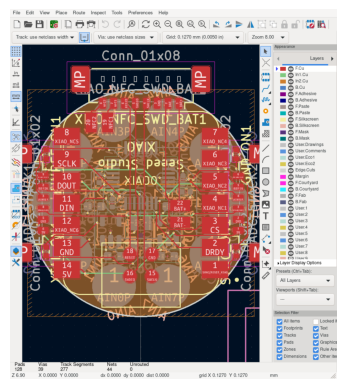

In [26]:
%cd /content/freeeeg8-alpha
%ls
board_file_name = "freeeeg8-alpha.kicad_pcb"
freerouting_file_name = "freerouting.dsn"

from IPython.display import clear_output
import matplotlib.pyplot as plt
from time import sleep

from easyprocess import EasyProcess

from pyvirtualdisplay.smartdisplay import SmartDisplay

with SmartDisplay(size = (1920, 1080)) as disp:
    with EasyProcess(["pcbnew", board_file_name]):
        for i in range(10):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","key","ctrl+w"]);
        for i in range(10):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","type","pcbnew.KICAD_PLUGINS['app_freerouting_kicad-plugin']['ModuleName'].plugin.FreeroutingPlugin().Run();","KP_Enter"]);
        freerouting_started=False
        for i in range(10):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
          if os.path.exists(freerouting_file_name):
            freerouting_started=True
        import subprocess;subprocess.Popen(["xdotool","key","KP_Enter"]);
        for i in range(10):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
          if os.path.exists(freerouting_file_name):
            freerouting_started=True
        import subprocess;subprocess.Popen(["xdotool","key","KP_Enter"]);
        for i in range(1000):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
          import os.path
          if os.path.exists(freerouting_file_name):
            freerouting_started=True
          else:
            if freerouting_started:
              break
        import subprocess;subprocess.Popen(["xdotool","mousemove","1440","500"]);
        for i in range(2):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","click","1"]);
        for i in range(2):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","key","ctrl+q"]);
        for i in range(4):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","key","ctrl+s"]);
        for i in range(4):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","key","ctrl+q"]);
        img = disp.waitgrab();clear_output();fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);


In [ ]:
%cd /content/freeeeg8-alpha
%ls
board_file_name = "freeeeg8-alpha.kicad_pcb"
pcbway_file_name = board_file_name+".zip"

from IPython.display import clear_output
import matplotlib.pyplot as plt
from time import sleep

from easyprocess import EasyProcess

from pyvirtualdisplay.smartdisplay import SmartDisplay

with SmartDisplay(size = (1920, 1080)) as disp:
    with EasyProcess(["pcbnew", board_file_name]):
        for i in range(10):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","key","ctrl+w"]);
        for i in range(10):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","type","pcbnew.KICAD_PLUGINS['com_github_pcbway_PCBWay-Plug-in-for-Kicad']['ModuleName'].plugin.Run();","KP_Enter"]);
        for i in range(10):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","key","KP_Enter"]);
        pcbway_started=False
        for i in range(1000):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
          import os.path
          if os.path.exists(pcbway_file_name):
            freerouting_started=True
            break
        import subprocess;subprocess.Popen(["xdotool","mousemove","1440","500"]);
        for i in range(2):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","click","1"]);
        for i in range(2):
          img = disp.waitgrab(autocrop=False);fig = plt.imshow(img);plt.axis('off');fig.axes.get_xaxis().set_visible(False);fig.axes.get_yaxis().set_visible(False);plt.show();sleep(1);
        import subprocess;subprocess.Popen(["xdotool","key","ctrl+q"]);


In [24]:
from google.colab import files
files.download(pcbway_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>